# Employee Performance Prediction
## Exploratory Data Analysis & Visualization

In [8]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [9]:

df = pd.read_csv("TestData_JesmiVJoy.csv")
df.head()


,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,8724,Technology,region_26,Bachelor's,m,sourcing,1,24,NaN,1,1,0,77
1,74430,HR,region_4,Bachelor's,f,other,1,31,3.0,5,0,0,51
2,72255,Sales & Marketing,region_13,Bachelor's,m,other,1,31,1.0,4,0,0,47
3,38562,Procurement,region_2,Bachelor's,f,other,3,31,2.0,9,0,0,65
4,64486,Finance,region_29,Bachelor's,m,sourcing,1,30,4.0,7,0,0,61


In [12]:

df.isnull().sum()


employee_id                0
department                 0
region                     0
education               1034
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    1812
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
dtype: int64

In [14]:

df['education'] = df['education'].fillna(df['education'].mode()[0])
df['previous_year_rating'] = df['previous_year_rating'].fillna(
    df['previous_year_rating'].median())

df = df.drop_duplicates()

df.shape


(23490, 13)

## Categorical Feature Distributions

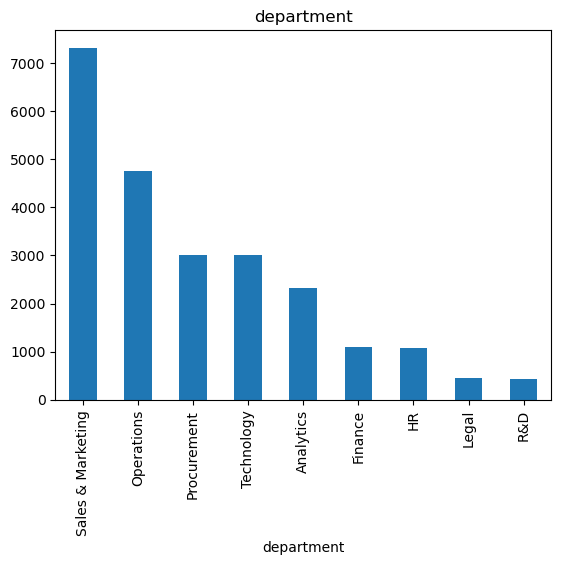

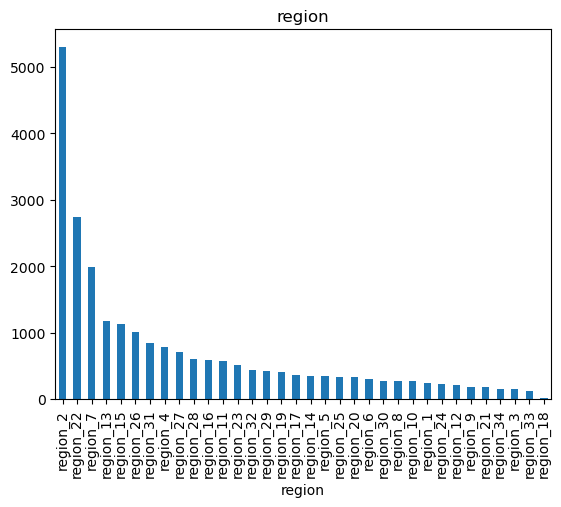

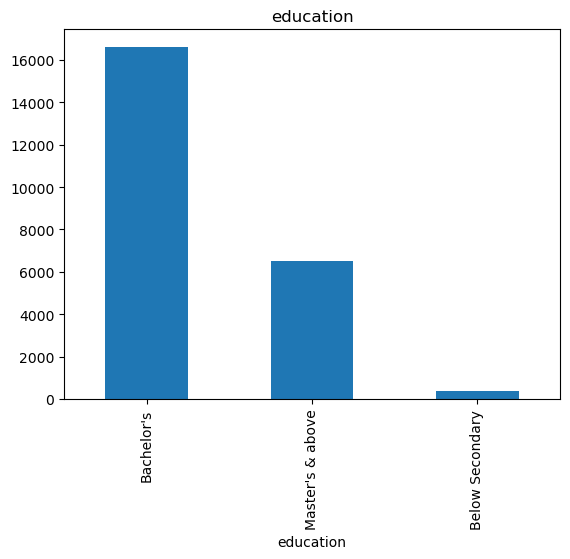

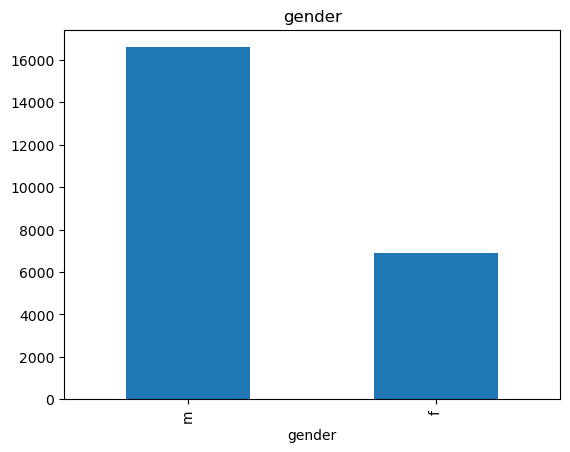

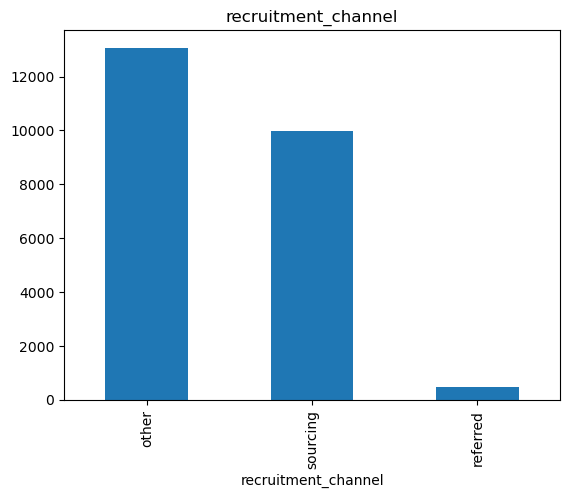

In [15]:

categorical_cols = ['department','region','education','gender','recruitment_channel']
for col in categorical_cols:
    plt.figure()
    df[col].value_counts().plot(kind='bar')
    plt.title(col)
    plt.show()


## Promotion Distribution

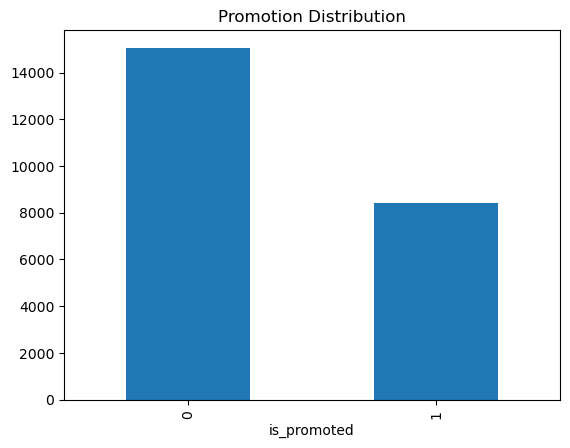

In [24]:

# Checking column names
df.columns

# Renaming target column for consistency
df = df.rename(columns={'KPIs_met >80%': 'is_promoted'})

# Promotion distribution
df['is_promoted'].value_counts().plot(kind='bar')
plt.title("Promotion Distribution")
plt.show()


## Numerical Feature Distributions

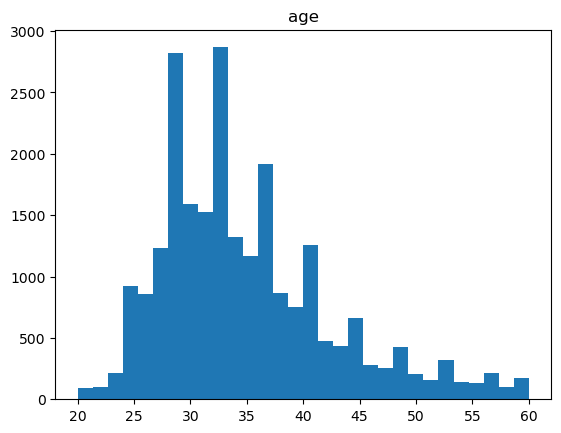

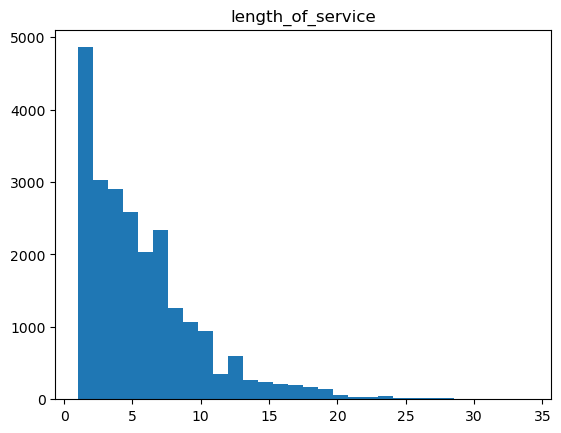

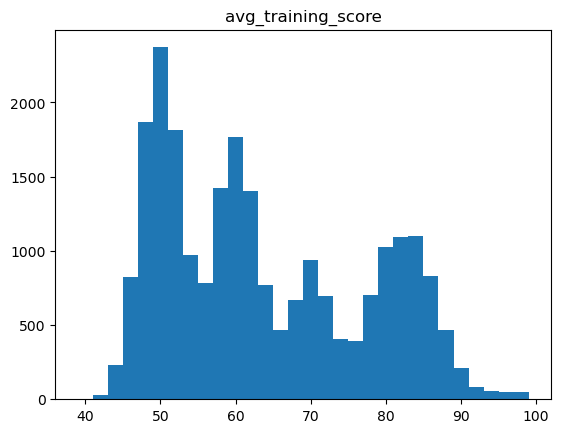

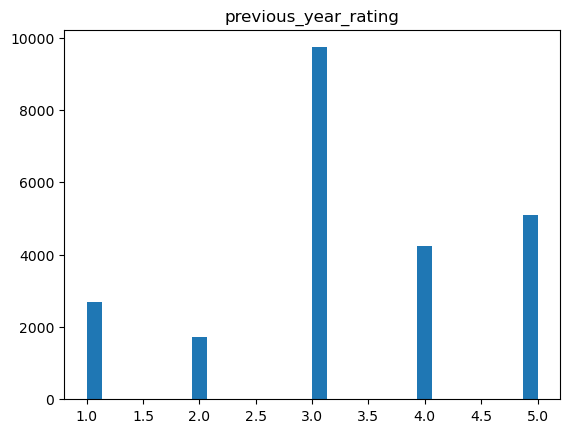

In [25]:

numerical_cols = ['age','length_of_service','avg_training_score','previous_year_rating']
for col in numerical_cols:
    plt.figure()
    plt.hist(df[col], bins=30)
    plt.title(col)
    plt.show()


## Correlation Heatmap

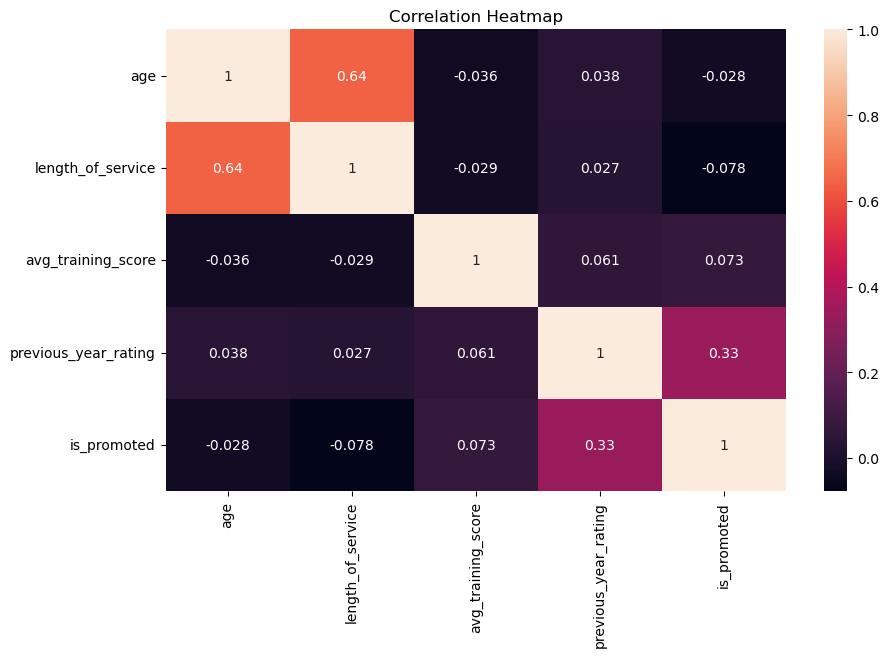

In [26]:

plt.figure(figsize=(10,6))
sns.heatmap(df[numerical_cols + ['is_promoted']].corr(), annot=True)
plt.title("Correlation Heatmap")
plt.show()
